<center><h1>Motivation</h1></center>

<p>
    Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates, it was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. For that, we are going to study a datased created with help of The Global Health Observatory (GHO), who keeps track of the health status as well as many other related factors for all countries. Therefore, we split this dataset into this parts:
</p>

<ol>
    <li>Importing libraries;</li>
    <li>Reading the dataset;</li>
    <li>Preparing the dataset:
        <ol>
            <li>Dtypes and null values:
                <ol>
                    <li>Removing unnecessary spaces from column names;</li>
                    <li>Removing unnecessary columns;</li>
                    <li>Removing rows with null values;</li>
                    <li>Transform object columns into binary;</li>
                </ol>
            </li>
            <li>Functions:
                <ol>
                    <li><code>comparing_histogramns</code>;</li>
                    <li><code>comparing_scatters</code>;</li>
                    <li><code>plot_bars</code>;</li>
                </ol>
            </li>
        </ol>
    </li>
    <li>Answering questions:
        <ol>
            <li>What are the predicting variables actually affecting the life expectancy?</li>
            <li>Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?</li>
            <li>How does Infant and Adult mortality rates affect life expectancy?</li>
            <li>Does Life Expectancy have positive or negative relationship with drinking alcohol?</li>
            <li>What is the impact of schooling on the lifespan of humans?</li>
            <li>Do densely populated countries tend to have lower life expectancy?</li>
        </ol>
    </li>
    <li>Cleaning the dataset;
        <ol>
            <li>Delete columns;</li>
            <li>Remove outliers;</li>
        </ol>
    </li>
    <li>Build a regression model;</li>
    <li>Chosing the model;</li>
    <li>Saving the model;</li>
</ol>

<h2>1. Importing libraries:</h2>

In [56]:
#to read, clean and change data:
import pandas as pd

#to model the data:
import numpy as np
from scipy.stats import gaussian_kde

#to visualize the data:
import matplotlib.pyplot as plt
import seaborn as sns

#to choose our future model:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression

#to evaluate our future model:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#to export our future model:
import joblib

<h2>2. Reading the dataset:</h2>

<p>The dataset was the following columns:</p>

<table>
    <thead>
        <tr>
            <th>Country</th>
            <th>Year</th>
            <th>Status</th>
            <th>Life expectancy</th>
            <th>Adult Mortality</th>
            <th>infant deaths</th>
            <th>Alcohol</th>
            <th>percentage expenditure</th>
            <th>Hepatitis B</th>
            <th>Measles</th>
            <th>BMI</th>
            <th>under-five deaths</th>
            <th>Polio</th>
            <th>Total expenditure</th>
            <th>Diphtheria</th>
            <th>HIV/AIDS</th>
            <th>GDP</th>
            <th>Population</th>
            <th>thinness 1-19 years</th>
            <th>thinness 5-9 years</th>
            <th>Income composition of resources</th>
            <th>Schooling</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Country</td>
            <td>Year</td>
            <td>Developed or Developing status</td>
            <td>Life Expectancy in age</td>
            <td>Probability of an adult Mortality per 1000 population</td>
            <td>Number of Infant Deaths per 1000 population</td>
            <td>Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)</td>
            <td>Expenditure on health as a percentage of Gross Domestic Product per capita(%)</td>
            <td>Hepatitis B (HepB) immunization coverage among 1-year-olds (%)</td>
            <td>Measles - number of reported cases per 1000 population</td>
            <td>Average Body Mass Index of entire population</td>
            <td>Number of under-five deaths per 1000 population</td>
            <td>Polio (Pol3) immunization coverage among 1-year-olds (%)</td>
            <td>General government expenditure on health as a percentage of total government expenditure (%)</td>
            <td>Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)</td>
            <td>Deaths per 1 000 live births HIV/AIDS (0-4 years)</td>
            <td>Gross Domestic Product per capita (in USD)</td>
            <td>Population of the country</td>
            <td>Prevalence of thinness among children and adolescents for Age 10 to 19 (%)</td>
            <td>Prevalence of thinness among children for Age 5 to 9(%)</td>
            <td>Human Development Index in terms of income composition of resources (index ranging from 0 to 1)</td>
            <td>Number of years of Schooling(years)</td>
        </tr>
    </tbody>
</table>

In [57]:
path = r"./dataset/life_expectancy_data.csv"
dataset = pd.read_csv(path)

#Here, we are setting display options to show us all columns:
pd.set_option('display.max_columns', None)

print(dataset.shape)
dataset.head()

(2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<h2>3. Cleaning the dataset:</h2>

<h3>3.1 Dtypes and null values:</h3>

In [58]:
#There are some missing values on the dataset that needs to be verify:
#Some columns are also with unnecessary space in their names, which is annoying to handle for future data analysis:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

<h4>3.1.A Removing unnecessary spaces from column names:</h4>

In [ ]:
#Here, we are just removing some extra spaces:
for column in dataset.columns:
    dataset = dataset.rename(
        columns = {
            column: column.strip()
        }
    )

dataset.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

<h4>3.1.B Removing unnecessary columns:</h4>

<p>We are trying to investigate if any columns has some relation with <q>Life expectancy</q>. Therefore, some dataset's columns are just irrelevant for our analysis, because, for it's own, do not have any usefull information. These columns are "Country" and "Year", because they are just here to indicate that some data are from different countries or years, but in the end this variables do not have any usefull relation with Life expectancy for it's own.</p>

In [60]:
remove_columns = ["Country", "Year"]

dataset.drop(
    remove_columns,
    axis = 1,
    inplace = True
)

dataset.head()

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<h4>3.1.C Removing rows with null values:</h4>

<p>We are trying to investigate the consequences from variables that do actually have a correlation with Life expectancy. Therefore, missing values is a big problem because they do not allow any understanding about how Life expectancy works when analysing all data. Because of that, we are going to ignore all rows with null values.</p>

In [61]:
#For now, let's just drop all rows with at least one missing value:
print(f"Total rows before: {dataset.shape[0]}")
dataset = dataset.dropna()

print(f"Total rows after: {dataset.shape[0]}")
dataset.head()

Total rows before: 2938
Total rows after: 1649


,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<h4>3.1.D Transform <code>object</code> columns into binary</h4>

<p>For our future machine learning algorithm and also for future analysis, we must transform columns that have <code>object</code> values into binary columns, for that, we will use the method <code>get_dummies</code> from pandas.</p>

In [62]:
columns_transform = ["Status"]

dummy_dataset = pd.get_dummies(
    data = dataset[columns_transform], 
    dtype = float
)

dataset.drop(
    columns = columns_transform,
    axis = 1,
    inplace = True
)

dataset.loc[:, ["Status_Developed", "Status_Developing"]] = dummy_dataset

print(dataset.shape)
dataset.head()

(1649, 21)


,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0.0,1.0
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0.0,1.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0.0,1.0
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0.0,1.0
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0.0,1.0


<h3>3.2 Functions:</h3>

<p>For our future analysis, we will need to answer some questions related to the data that we are handling. For that, we are going to create some functions that will provide us some graphs to help us prove our points.</p>

<h4>3.2.A <code>comparing_histogramns</code>:</h4>

In [63]:
def comparing_histogramns(datas, column, xlabel):

    fig, ax = plt.subplots(1, len(datas), figsize=(15, 5))

    for index, data in enumerate(datas):

        ax1 = ax[index]

        # First histogramn
        counts, bins, _ = ax1.hist(data["dataset"][column], bins=30, alpha= 0.5, color=data["color"], edgecolor='black', rwidth=0.9, density=True)
        ax1.set_title(data["title"])
        ax1.set_xlabel(xlabel)
        ax1.set_ylabel('Frequency')

        # Find KDE for histogramn:
        kde1 = gaussian_kde(data["dataset"][column])
        x1 = np.linspace(bins[0], bins[-1], 100)
        ax1.plot(x1, kde1(x1), color='#333333', linewidth=2, label='Tendency')
        ax1.legend()

    plt.tight_layout()
    plt.show()

<h4>3.2.B <code>comparing_scatters</code>:</h4>

In [64]:
def comparing_scatters(datas, column, limit):

    fig, ax = plt.subplots(1, len(datas), figsize=(15, 5))

    for index, data in enumerate(datas):

        try: ax1 = ax[index]
        except: ax1 = ax

        ax1.scatter(
            x = data["dataset"][data["column"]],
            y = data["dataset"][column],
            color = data["color"],
            alpha = 0.2,
            edgecolor='black'
        )

        ax1.set_title(data["title"])
        ax1.set_xlabel(data["label"])
        ax1.set_ylabel(column)

        ax1.plot(
            np.linspace(data["dataset"][data["column"]].min(), data["dataset"][data["column"]].max(), 100),
            np.linspace(limit, limit, 100),
            color = "red"
        )

    plt.show()

<h4>3.2.C <code>plot_bars</code>:</h4>

In [65]:
def plot_bars(dataset, column, title):

    new_dataset = pd.DataFrame(
        dataset.corr()[column].sort_values(ascending = False)
    )

    new_dataset.drop(
        labels = column,
        axis = 0,
        inplace = True,
    )

    fig, ax = plt.subplots(figsize = (15, 5))
    colors = []

    for row in new_dataset.index:
        if new_dataset.loc[row, column] > 0: colors.append("green")
        else: colors.append("red")

    ax.bar(
        new_dataset.index,
        new_dataset[column],
        edgecolor = 'gray',
        alpha = 0.7,
        color = colors
    )

    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

<h2>4. Answering questions:</h2>

<h3>4.1 What are the predicting variables actually affecting the life expectancy?</h3>

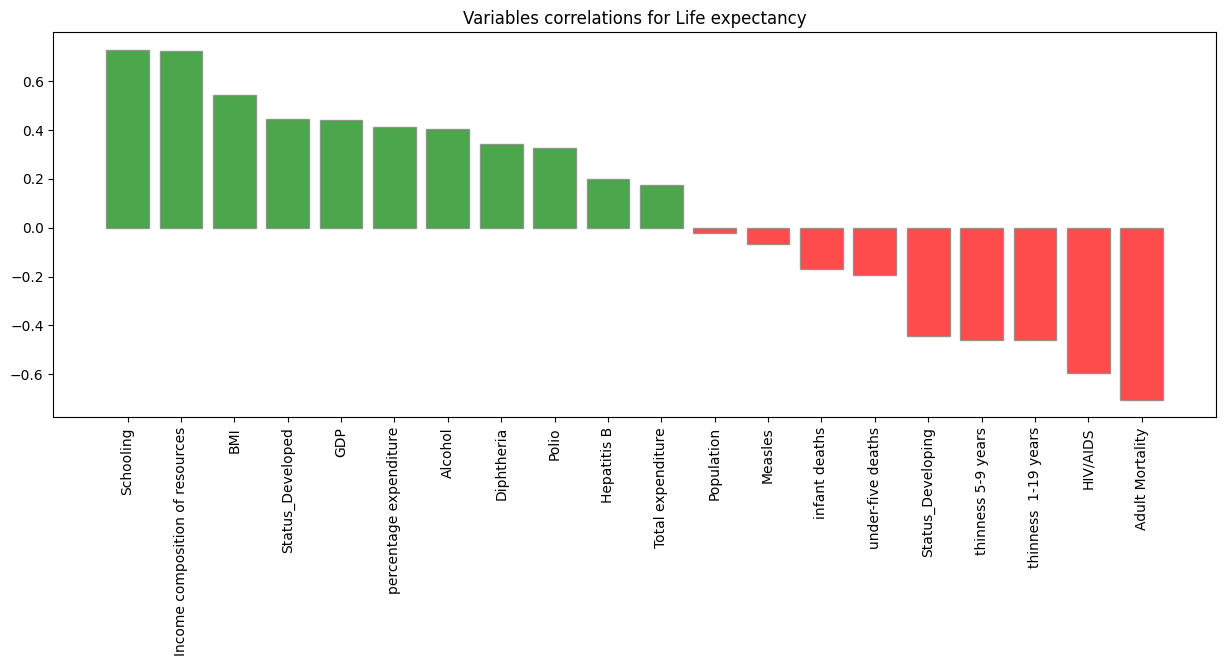

In [66]:
#To answer this question, look at the correlation bar chart to understand which columns have the most high correlation with Life expectancy column:
plot_bars(
    dataset = dataset,
    column = "Life expectancy",
    title = "Variables correlations for Life expectancy"
)

<h4>Answer: Schooling, Income composition of resources and BMI have the most positive impact on Life expectancy amoung all other variables. However, Adult Mortality, HIV/AIDS and the draw of thinness 1-19 years and thinness 5-9 years have the most negative impact on Life expectancy.</h4>

<h3>4.2 Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?</h3>

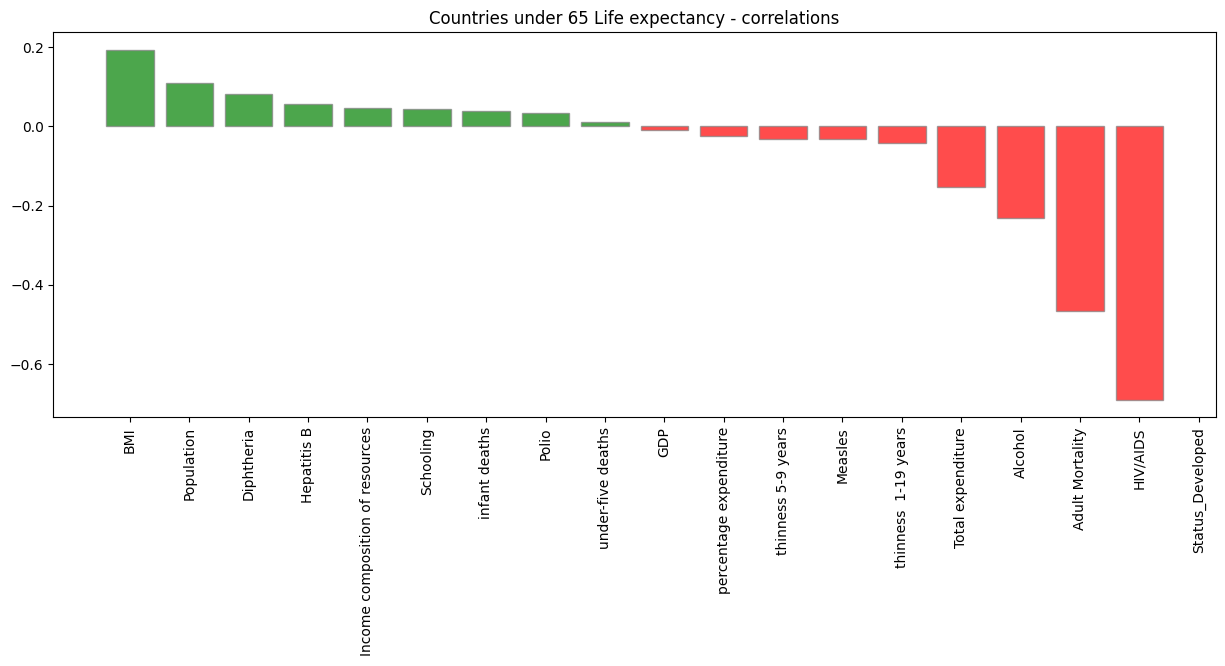

In [67]:
#Creating a dataset where Life expectancy is lower than 65 years:
filter_dataset =  dataset[
        dataset["Life expectancy"] < 65
    ]

plot_bars(
    dataset = filter_dataset,
    column = "Life expectancy",
    title = "Countries under 65 Life expectancy - correlations"
)

#If we take a closer look in the correlation graph for Life expectancy in this case, we see that BMI is the most crucial indicator to a higher Life expectancy, while HIV/AIDS is the opposite.

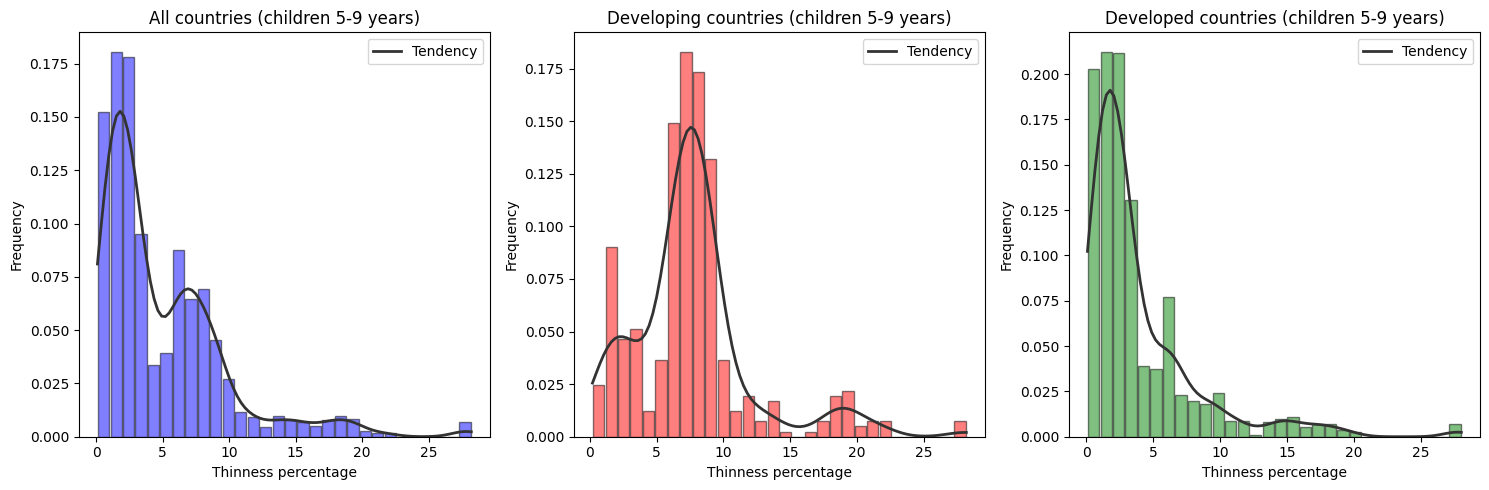

In [68]:
#To answer this question, let's compare thinness 5-9 years bettwen differents parts of the entire dataset:

#Here, we create another dataset that is the opposite of filter_dataset
developed_dataset = dataset[
    dataset["Life expectancy"] >= 65
]

comparing_histogramns(
    datas = [
        {
            "dataset": dataset,
            "title": "All countries (children 5-9 years)",
            "color": "blue",
        }, {
            "dataset": filter_dataset,
            "title": "Developing countries (children 5-9 years)",
            "color": "red",
        }, {
            "dataset": developed_dataset,
            "title": "Developed countries (children 5-9 years)",
            "color": "green"
        }
    ],
    column = "thinness 5-9 years",
    xlabel = "Thinness percentage"
)

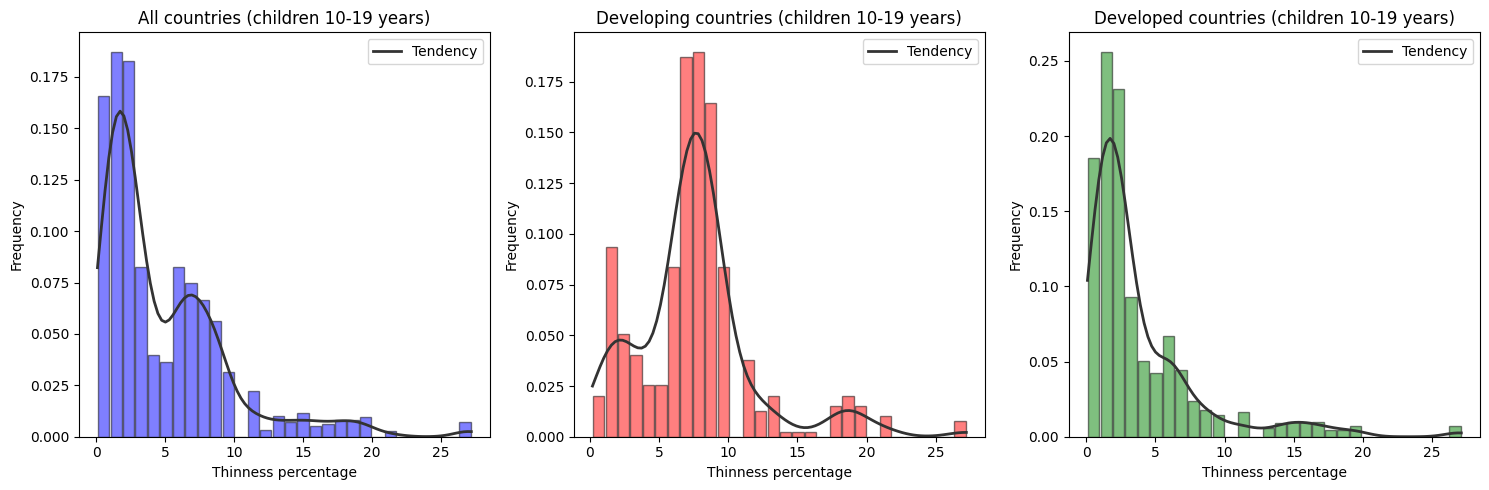

In [69]:
comparing_histogramns(
    datas = [
        {
            "dataset": dataset,
            "title": "All countries (children 10-19 years)",
            "color": "blue",
        }, {
            "dataset": filter_dataset,
            "title": "Developing countries (children 10-19 years)",
            "color": "red",
        }, {
            "dataset": developed_dataset,
            "title": "Developed countries (children 10-19 years)",
            "color": "green"
        }
    ],
    column = "thinness  1-19 years",
    xlabel = "Thinness percentage"
)

<h4>Answer: as we saw, for countries that have a Life expectancy below 65 years, HIV/AIDS, Adult Mortality and Income composition of resources are variables with negative correlations with Life expenctancy - those variables imply that increase healthcare expenditure is a solution for the most part of the problem. Otherwise, if we take a look to the correlation positive perspective, BMI is the most importanting thing to consider. That is true because Thinness for countries in development (no matter the age gap) is a downgrade for Life expectancy, as we saw with the histogramns. Thus, those countries also need to decrease hungry.</h4>

<h3>4.3 How does Infant and Adult mortality rates affect life expectancy?</h3>

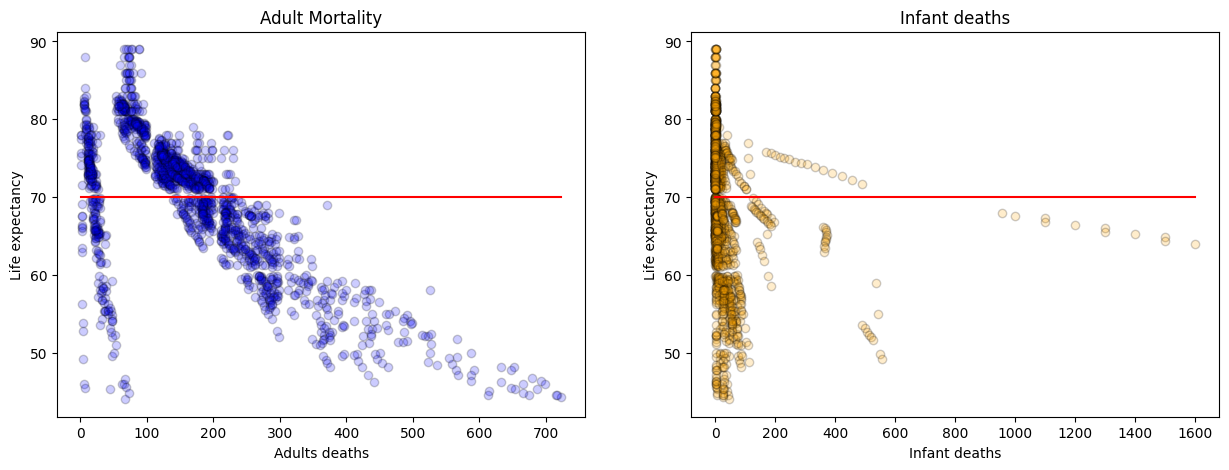

In [70]:
# To answer this question, let's consider that Life expectancy of 70 years old is good enough. 
comparing_scatters(
    datas = [
        {
            "dataset": dataset,
            "title": "Adult Mortality",
            "color": "blue",
            "column": "Adult Mortality",
            "label": "Adults deaths"
        }, {
            "dataset": dataset,
            "title": "Infant deaths",
            "color": "orange",
            "column": "infant deaths",
            "label": "Infant deaths"
        }
    ],
    column = "Life expectancy",
    limit = 70
)

# Here, we see that, for each variable, the highest Life expectancy countries are concentrated when Adults deaths or Infant deaths are the lowest.  

<h4>Answer: according to both scatter plots, we see that countries with the highest Life expectancy scores are in concentration in lower Adults and Infants deaths. The opposite also implies the same.</h4>

<h3>4.4 Does Life Expectancy have positive or negative relationship with drinking alcohol?</h3>

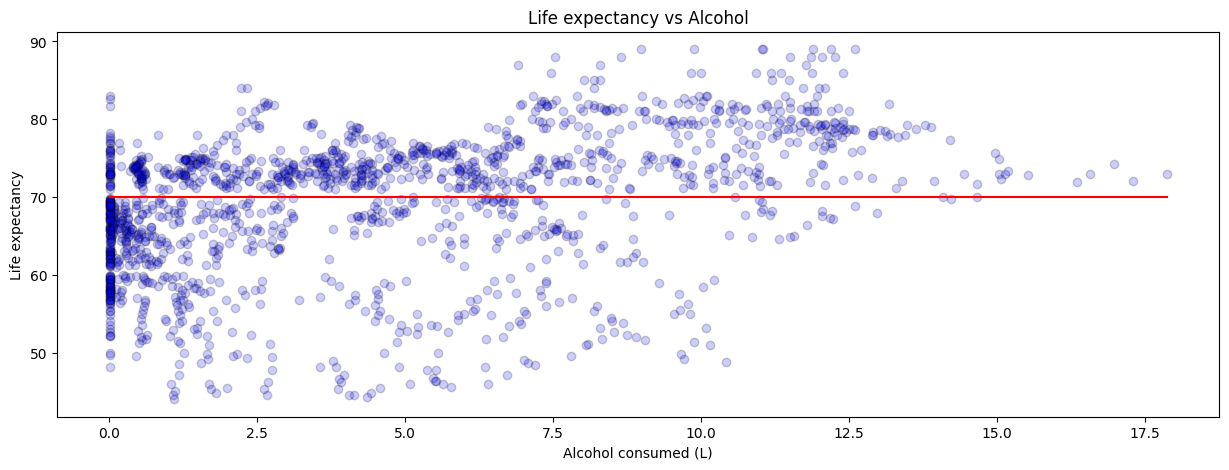

In [71]:
comparing_scatters(
    datas = [
        {
            "dataset": dataset,
            "title": "Life expectancy vs Alcohol",
            "color": "blue",
            "column": "Alcohol",
            "label": "Alcohol consumed (L)"
        },
    ],
    column = "Life expectancy",
    limit = 70
)

<h4>Answer: Alcohol is a very good indicator to countries that has a higher Life expectancy score. However, that does not mean that bad habits implies a long life. What occurs is that the habit of consuming alcohol is maybe a privilege or a joyfull moment for countries with highest Life expectancy.</h4>

<h3>4.5 What is the impact of schooling on the lifespan of humans?</h3>

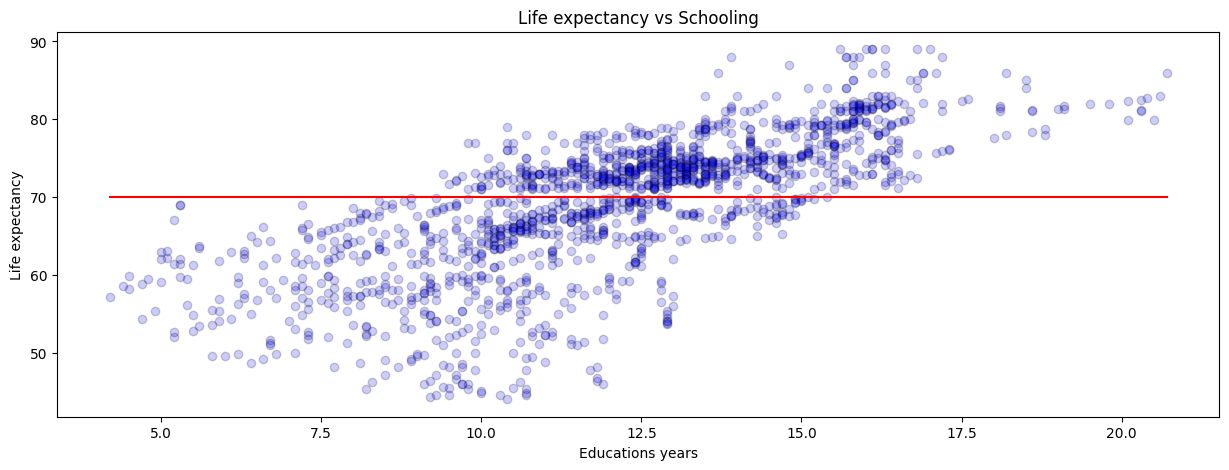

In [72]:
comparing_scatters(
    datas = [
        {
            "dataset": dataset,
            "title": "Life expectancy vs Schooling",
            "color": "blue",
            "column": "Schooling",
            "label": "Educations years"
        },
    ],
    column = "Life expectancy",
    limit = 70
)

<h4>Answer: the average years of education is a true mark to separate contries that have or not a high Life expectancy. Then, schooling has a positive impact.</h4>

<h3>4.6 Do densely populated countries tend to have lower life expectancy?</h3>

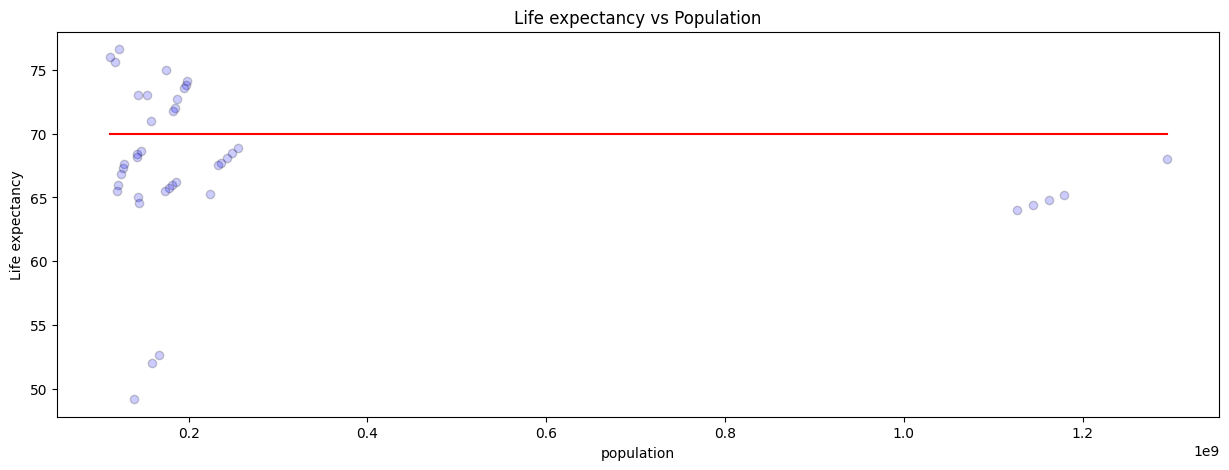

In [73]:
#Let's assume that a very populated country has at least 100_000_000 habitants.
comparing_scatters(
    datas = [
        {
            "dataset": dataset[dataset["Population"] > 100_000_000],
            "title": "Life expectancy vs Population",
            "color": "blue",
            "column": "Population",
            "label": "population"
        },
    ],
    column = "Life expectancy",
    limit = 70
)

<h4>Answer: the highest populated countries do not have a good Life expectancy score in majority.</h4>

<h2>5. Cleaning the dataset:</h2>

<p>After some data analysis, here we are going to clear the data to build a machine learn model.</p>

<h3>5.1 Delete columns:</h3>

<p>Here, we are going to delete columns that have a very high module correlation with Life expectancy. Otherwise, these columns can make our model vicious.</p>

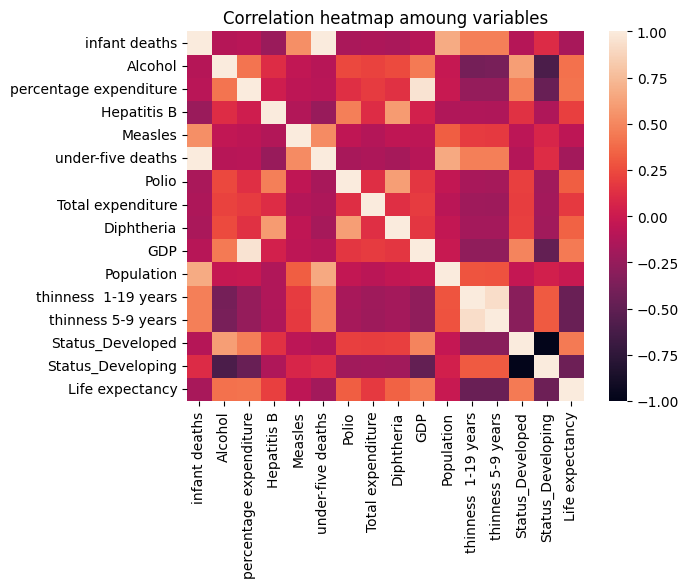

In [74]:
#Therefore, let's just delete all columns that has a module correlation with Life expectancy more than 0.5, 
correlation_dataset = dataset.corr()[["Life expectancy"]]
correlation_dataset["Life expectancy"] = np.abs(correlation_dataset["Life expectancy"])

drop_columns = list(
    correlation_dataset[
        correlation_dataset["Life expectancy"] <= 0.5
    ].index
)

drop_columns.append("Life expectancy")

dataset = dataset[drop_columns]

sns.heatmap(
    data = dataset.corr()
)

plt.title("Correlation heatmap amoung variables")
plt.show()

In [75]:
dataset.columns

Index(['infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Status_Developed', 'Status_Developing',
       'Life expectancy'],
      dtype='object')

<h3>5.2 Remove outliers:</h3>

<p>Outliers are problems because in machine learning they force certain unexpected behaviours, so we need to delete them.</p>

In [ ]:
analysing_columns = [
    'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
    'Measles', 'under-five deaths', 'Polio', 'Total expenditure',
    'Diphtheria', 'GDP', 'Population', 'thinness  1-19 years',
    'thinness 5-9 years'
]

for column in analysing_columns:

    q1 = dataset[column].quantile(0.25)
    q3 = dataset[column].quantile(0.75)

    gap = q3 - q1

    dataset = dataset[
        (
            dataset[column] > q1 - 1.5*gap
        ) & (
            dataset[column] < q3 + 1.5*gap
        )
    ]


print(dataset.shape)
dataset.head()

,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,under-five deaths,Polio,Total expenditure,Diphtheria,GDP,Population,thinness 1-19 years,thinness 5-9 years,Status_Developed,Status_Developing,Life expectancy
16,0,4.60,364.975229,99.0,0,0,99.0,6.00,99.0,3954.227830,28873.0,1.2,1.3,0.0,1.0,77.8
17,0,4.51,428.749067,98.0,0,1,98.0,5.88,98.0,4575.763787,288914.0,1.2,1.3,0.0,1.0,77.5
18,0,4.76,430.876979,99.0,0,1,99.0,5.66,99.0,4414.723140,289592.0,1.3,1.4,0.0,1.0,77.2
19,0,5.14,412.443356,99.0,9,1,99.0,5.59,99.0,4247.614380,2941.0,1.3,1.4,0.0,1.0,76.9
20,0,5.37,437.062100,99.0,28,1,99.0,5.71,99.0,4437.178680,295195.0,1.4,1.5,0.0,1.0,76.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,16,0.01,0.442802,99.0,8,18,99.0,5.84,99.0,25.448414,37577.0,3.0,3.1,0.0,1.0,69.2
2828,17,0.01,19.162470,99.0,0,19,99.0,6.32,99.0,197.551233,32432.0,3.0,3.1,0.0,1.0,69.1
2829,18,0.01,16.714063,99.0,0,21,99.0,6.49,99.0,174.468298,297745.0,3.0,3.1,0.0,1.0,68.8
2831,20,2.73,119.457115,99.0,117,23,99.0,5.34,99.0,1377.821400,285624.0,3.0,3.1,0.0,1.0,68.3


<h2>6. Build a regression model:</h2>

<p>Finally, we will create and train machine learning models that will learn our data in hope to find the best model possible. In order to find the best model possible, we are going to train 3 differents models at least 50 times. For each time, we will give to each model a different data. These are the algorithmns that we will train:</p>

<ol>
    <li>LinearRegression;</li>
    <li>ExtraTreesRegressor;</li>
    <li>RandomForestRegressor;</li>
</ol>

In [79]:
models = [
    {
        "model": LinearRegression,
        "model_name": "linear_regressor", 
    }, {
        "model": ExtraTreesRegressor,
        "model_name": "extra_trees_regressor", 
    }, {
        "model": RandomForestRegressor,
        "model_name": "random_forest_regressor", 
    },
]

models_trained = []

for i in range(0, 50):

    X_train, X_test, y_train, y_test = train_test_split(
        dataset.drop("Life expectancy", axis = 1),
        dataset["Life expectancy"],
        train_size = 0.7,
        random_state = i
    )

    for model in models:

        new_model = model["model"]().fit(X_train, y_train)

        models_trained.append(
            {
                "model": new_model,
                "model_name": model["model_name"],
                "r2_score": r2_score(
                    y_true = y_test,
                    y_pred = new_model.predict(X_test)
                ),
                "mean_squared_error": mean_squared_error(
                    y_true = y_test,
                    y_pred = new_model.predict(X_test)
                ),
                "random_state": i,
            }
        )


<h2>7. Chosing the model:</h2>

<p>Here, we will choose the best model.</p>

In [78]:
models_scores = pd.DataFrame(
    models_trained
)

models_scores.loc[:, "Final score"] = (1 - models_scores.loc[:, "r2_score"])*models_scores.loc[:, "mean_squared_error"]

models_scores.sort_values(
    "Final score",
    ascending = True,
    inplace = True
)

models_scores.reset_index(drop = True, inplace = True)

#Finally, we have the best model:
best_model = models_scores.loc[0, "model"]

display(models_scores)

,model,model_name,r2_score,mean_squared_error,random_state,Final score
0,"(ExtraTreeRegressor(random_state=1127114400), ...",extra_trees_regressor,0.914861,4.090114,31,0.348228
1,"(ExtraTreeRegressor(random_state=2081823325), ...",extra_trees_regressor,0.904255,4.196836,34,0.401828
2,"(ExtraTreeRegressor(random_state=510495315), E...",extra_trees_regressor,0.899574,4.560363,26,0.457978
3,"(ExtraTreeRegressor(random_state=512267485), E...",extra_trees_regressor,0.896507,4.713068,7,0.487769
4,"(ExtraTreeRegressor(random_state=1917641203), ...",extra_trees_regressor,0.890945,4.514020,30,0.492279
...,...,...,...,...,...,...
145,LinearRegression(),linear_regressor,0.367904,23.895217,47,15.104067
146,LinearRegression(),linear_regressor,0.462165,28.876748,6,15.530915
147,LinearRegression(),linear_regressor,0.423951,27.201590,35,15.669439
148,LinearRegression(),linear_regressor,0.423736,29.989478,49,17.281862


<h2>8. Saving the model:</h2>

<p>Finally, we save the model for future predictions:</p>

In [81]:
joblib.dump(
    filename = "life_expectancy_model.joblib",
    value = best_model
)

['life_expectancy_model.joblib']